Copyright **`(c)`** Beatrice Occhiena s314971. See [`LICENSE`](https://github.com/beatrice-occhiena/Computational_intelligence/blob/main/LICENSE) for details.

# LAB 01 - Set Covering

## Introduction
---

### Problem Statement
The Set Covering Problem is a classical optimization problem in computer science and mathematics. It can be stated as follows:

> Given a set of elements $U = \{1, 2, ..., n\}$, and a collection $S_1, S_2, ..., S_m$ of subsets of $U$ such that $\bigcup_{i=1}^m S_i = U$, find the smallest sub-collection of $S_i$ whose union equals $U$. 

INPUT
- A finite universe $U$ of n elements
- A collection of subsets $S_i$ of $U$

OUTPUT: A sub-collection of $S_i$ whose union equals $U$

OBJECTIVE: Minimize the number of sets in the sub-collection

### Project Objectives

**1 - Implementation of Search Algorithms**

The aim of this project is to implement a set of search algorithms to efficiently solve the Set Covering Problem. We are going to explore the differences between the following algorithms in terms of performance and quality of the solution.
- Depth-First Search
- Breadth-First Search
- Best-First Search (Greedy)
- A* Search

**2 - Integration of Heuristic Function (H)**

Focusing on the A* search algorithm, we will employ a heuristic function (H) to guide the search process. The heuristic function estimates the distance from the current state to the goal state. 
To be sure to find the optimal solution, the heuristic function must be:
- Admissible: It never overestimates the cost of reaching the goal, so that $H(n) \leq H^*(n)$
- Consistent: It satisfies the triangle inequality, so that $H(n) \leq c(n, a, n') + H(n')$

In this project, we will explore different heuristics for the Set Covering Problem and compare their performances in terms of:
- Number of nodes expanded
- Number of nodes generated
- Quality of the solution


**3 - Special Sets Consideration**

In practice, some subsets might have unique characteristics or properties. We will investigate how to handle "special sets" within the context of the Set Covering Problem to improve the efficiency of the search.

**4 - Optimizing Set Order**

The order in which sets are selected can impact the efficiency of the solution. We will analyze strategies for optimizing the order in which subsets are considered to achieve more efficient and quicker solutions.


## Code Implementation
---

### Imported libraries

In [3]:
import numpy as np
from collections import namedtuple
import matplotlib.pyplot as plt


### Problem initialization
First of all, we need to define the `UNIVERSE_SIZE` and the `NUMBER_OF_SETS`. Each set is represented by a vector of binary values, where 1 means that the element is present in the set, 0 means that the element is not present in the set. We can control the `DENSITY` of the sets by adjusting the probability of 1s in the vector.

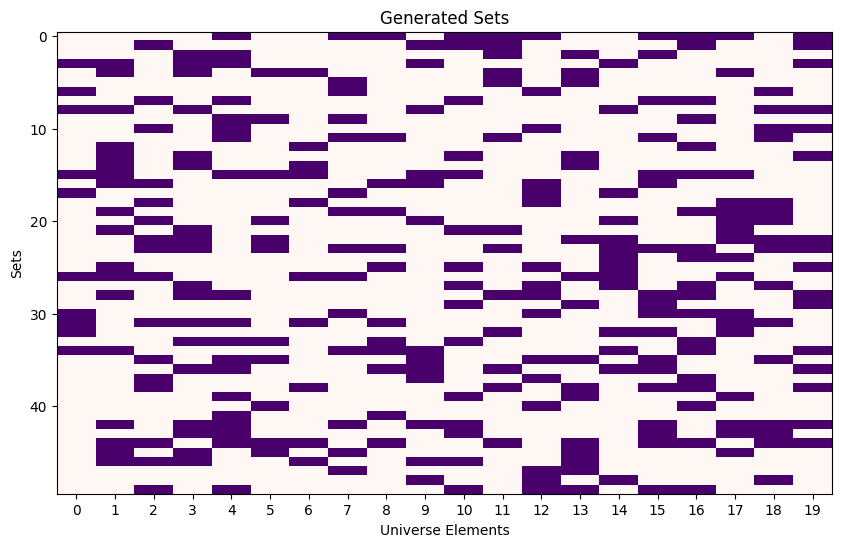

In [54]:
UNIVERSE_SIZE = 20
NUMBER_OF_SETS = 50
DENSITY = 0.3

"""
  SETS GENERATION
  Boolean array of shape (NUMBER_OF_SETS, UNIVERSE_SIZE) 
  where sets[i, j] is True if the j-th element of the universe is in the i-th set.
"""
sets = np.random.rand(NUMBER_OF_SETS, UNIVERSE_SIZE) < DENSITY

"""
  SETS VISUALIZATION
  Each set is represented by a row of the matrix.
  The elements of the universe are represented by the columns of the matrix.
"""
plt.figure(figsize=(10, 6))
im = plt.imshow(sets, cmap='RdPu', aspect='auto')
plt.title("Generated Sets")
plt.xlabel("Universe Elements")
plt.xticks(np.arange(UNIVERSE_SIZE))
plt.ylabel("Sets")
plt.show()

"""
  PROBLEM FEASIBILITY CHECK
  Check if the sets cover the universe
  i.e. if the sum of the sets is greater than 0 for all elements of the universe.
"""
assert np.all(np.sum(sets, axis=0) > 0)
